<a href="https://colab.research.google.com/github/asmaanassiri/C-Wire_project_Asmaa_Nassiri-main/blob/main/effet_ramsauer_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Numérique : Effet Ramsauer-Townsend
Simulation numérique du paquet d'ondes à travers un puits de potentiel fini.

In [1]:
# Imports requis
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.sparse import identity, csc_matrix
from scipy.sparse.linalg import splu
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Paramètres physiques et numériques
hbar = 1.0
m = 1.0
V0 = 50
a = 1.0
x_min, x_max = -5.0, 5.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]
V = np.zeros_like(x)
V[np.abs(x) < a] = -V0

État 0 : Énergie = -48.9831
État 1 : Énergie = -45.9406
État 2 : Énergie = -40.8984
État 3 : Énergie = -33.9089
État 4 : Énergie = -25.0721


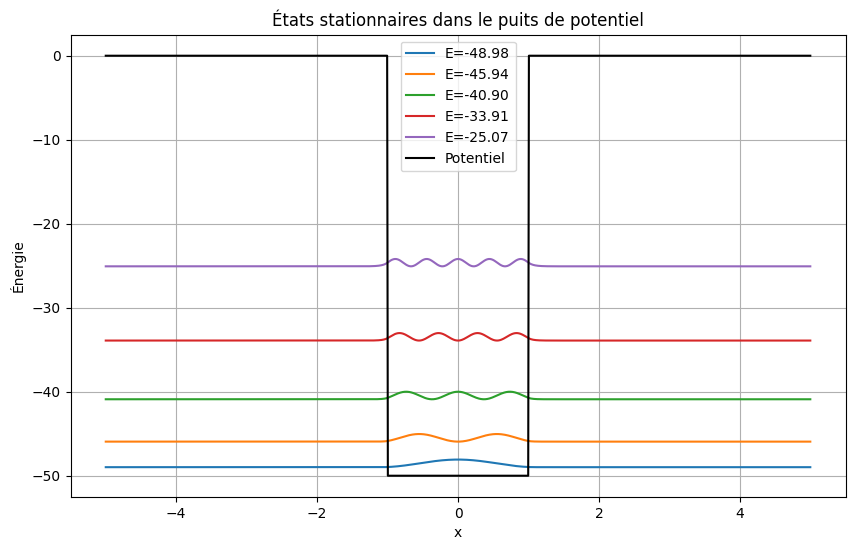

In [3]:
# Résolution de Schrödinger stationnaire
def solve_stationary_states(V, dx, Nstates=5):
    diag = 1.0 / dx**2 + V
    off_diag = -0.5 / dx**2 * np.ones(N - 1)
    energies, wavefuncs = eigh_tridiagonal(diag, off_diag)
    return energies[:Nstates], wavefuncs[:, :Nstates]

energies, wavefuncs = solve_stationary_states(V, dx)
wavefuncs /= np.sqrt(dx) * np.linalg.norm(wavefuncs, axis=0)
for i, E in enumerate(energies):
    print(f"État {i} : Énergie = {E:.4f}")
plt.figure(figsize=(10,6))
for i in range(len(energies)):
    plt.plot(x, wavefuncs[:, i]**2 + energies[i], label=f"E={energies[i]:.2f}")
plt.plot(x, V, color='black', label="Potentiel")
plt.title("États stationnaires dans le puits de potentiel")
plt.xlabel("x")
plt.ylabel("Énergie")
plt.grid()
plt.legend()
plt.show()

In [4]:
# Paquet d'ondes - dynamique temporelle
x0 = -2.0
sigma = 0.3
p0 = 10.0
dt = 0.005
T = 1.0
Nt = int(T/dt)

def psi_0(x):
    return (1/(sigma * np.sqrt(np.pi)))**0.5 * np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * p0 * x)

psi = psi_0(x)
Lap = (-2*np.eye(N) + np.eye(N, k=1) + np.eye(N, k=-1)) / dx**2
H = -0.5 * Lap + np.diag(V)
H_sparse = csc_matrix(H)
I_sparse = identity(N, format="csc", dtype=complex)
A = (I_sparse + 1j * dt / 2 * H_sparse)
B = (I_sparse - 1j * dt / 2 * H_sparse)
lu = splu(A)
psis = [psi.copy()]
for _ in range(Nt):
    rhs = B @ psi
    psi = lu.solve(rhs)
    psis.append(psi.copy())
psis = np.array(psis)

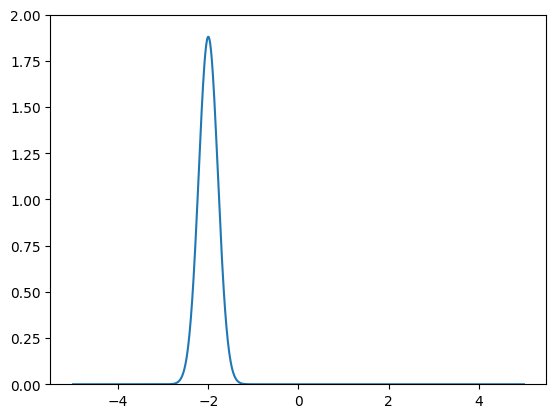

In [5]:
# Animation de la propagation
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psis[0])**2)
ax.set_ylim(0, 2)
def update(frame):
    line.set_ydata(np.abs(psis[frame])**2)
    return line,
ani = FuncAnimation(fig, update, frames=range(0, Nt, 10), interval=50)
HTML(ani.to_jshtml())